<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/ModelTuningExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [123]:
(images, labels), _ = mnist.load_data()

In [124]:
import matplotlib.pyplot as plt

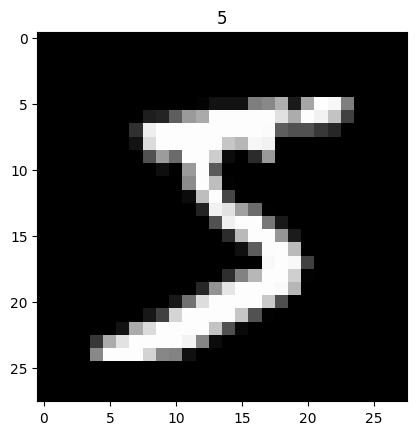

In [125]:
plt.title(labels[0])
plt.imshow(images[0], cmap='gray');

In [126]:
images.shape

(60000, 28, 28)

In [127]:
images = images.reshape((60_000, 28 * 28))
images = images.astype('float32') / 255.0

In [128]:
images.shape

(60000, 784)

In [129]:
labels.shape

(60000,)

# **FAST (BUT UNACCURATE) MODEL**


In [130]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [131]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1.),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [132]:
model.fit(
    images, labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 497.6995 - accuracy: 0.2608 - val_loss: 2.3181 - val_accuracy: 0.1433
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 2.6450 - accuracy: 0.1792 - val_loss: 2.3423 - val_accuracy: 0.1446
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5151 - accuracy: 0.1679 - val_loss: 2.2251 - val_accuracy: 0.1703
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 2.3974 - accuracy: 0.1791 - val_loss: 2.1512 - val_accuracy: 0.1981
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.3450 - accuracy: 0.1805 - val_loss: 2.2206 - val_accuracy: 0.1797
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2560 - accuracy: 0.1906 - val_loss: 2.3396 - val_accuracy: 0.1889
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 2.2514 - accuracy: 0.2059 - val_loss: 2.2561 - val_accuracy: 0.19

NOW LET'S TRY SLOWER MODEL

In [133]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [134]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [135]:
model.fit(
    images, labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.3526 - accuracy: 0.9102 - val_loss: 0.1319 - val_accuracy: 0.9613
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1285 - accuracy: 0.9642 - val_loss: 0.1267 - val_accuracy: 0.9687
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1014 - accuracy: 0.9733 - val_loss: 0.1780 - val_accuracy: 0.9630
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0809 - accuracy: 0.9798 - val_loss: 0.1352 - val_accuracy: 0.9729
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0682 - accuracy: 0.9830 - val_loss: 0.1802 - val_accuracy: 0.9703
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0586 - accuracy: 0.9861 - val_loss: 0.1881 - val_accuracy: 0.9695
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0533 - accuracy: 0.9874 - val_loss: 0.1925 - val_accuracy: 0.9728

In [136]:
# FINE